# EDA

In [72]:
import time
import random
import tqdm

import folium
from folium.plugins import HeatMap

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

#option
sns.set_theme(style='darkgrid', palette='rocket')
pd.set_option('max_colwidth', 600)
pd.set_option('display.width', 600)

In [73]:
df = pd.read_csv('df_3.csv', index_col=0)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462 entries, 0 to 467
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            462 non-null    object 
 1   day             462 non-null    int64  
 2   month           462 non-null    int64  
 3   year            462 non-null    int64  
 4   dayofweek       462 non-null    int64  
 5   rooms           462 non-null    int64  
 6   district        392 non-null    object 
 7   street          462 non-null    object 
 8   floor           462 non-null    float64
 9   total_floors    462 non-null    float64
 10  total_area      462 non-null    float64
 11  living_area     462 non-null    float64
 12  kitchen_area    462 non-null    float64
 13  price           462 non-null    float64
 14  lat_long        323 non-null    object 
 15  park_eko        323 non-null    float64
 16  attraction      323 non-null    float64
 17  south           323 non-null    float64


In [75]:
round(df.isna().mean(), 2)

date              0.00
day               0.00
month             0.00
year              0.00
dayofweek         0.00
rooms             0.00
district          0.15
street            0.00
floor             0.00
total_floors      0.00
total_area        0.00
living_area       0.00
kitchen_area      0.00
price             0.00
lat_long          0.30
park_eko          0.30
attraction        0.30
south             0.30
eternal_fire      0.30
veter             0.30
price_sq_meter    0.00
city_center       0.30
floor_type        0.00
dtype: float64

In [76]:
df.describe()

,day,month,year,dayofweek,rooms,floor,total_floors,total_area,living_area,kitchen_area,price,park_eko,attraction,south,eternal_fire,veter,price_sq_meter,city_center
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,323.000000,323.000000,323.000000,323.000000,323.000000,462.000000,323.000000
mean,17.831169,6.982684,2022.978355,2.426407,2.149351,3.467532,6.071429,55.894870,31.793593,8.872229,3459.116883,4.234737,4.215077,5.385325,3.842508,4.944303,64.053732,3.797647
std,8.276516,1.835928,0.145679,1.582851,0.973282,2.518915,3.577055,28.198911,18.050946,4.624045,1552.399398,2.145156,2.467668,3.306366,1.965234,2.836573,17.262921,2.140219
min,1.000000,1.000000,2022.000000,0.000000,-1.000000,-1.000000,1.000000,14.100000,0.000000,0.000000,400.000000,0.450000,0.850000,0.110000,0.670000,0.340000,6.907895,0.160000
25%,12.000000,6.000000,2023.000000,1.000000,1.000000,1.000000,3.000000,41.000000,19.000000,6.000000,2400.000000,2.975000,2.290000,2.505000,2.160000,2.060000,57.914100,2.100000
50%,21.000000,8.000000,2023.000000,2.000000,2.000000,3.000000,5.000000,50.775000,30.000000,8.000000,3300.000000,3.960000,3.540000,5.420000,3.600000,5.600000,64.990218,3.430000
75%,24.000000,8.000000,2023.000000,3.000000,3.000000,5.000000,9.000000,65.075000,43.000000,10.000000,4250.000000,5.275000,5.580000,7.940000,5.300000,7.415000,71.493506,5.405000
max,31.000000,12.000000,2023.000000,6.000000,5.000000,14.000000,17.000000,318.000000,150.000000,40.000000,12750.000000,12.640000,14.330000,15.830000,10.630000,10.760000,145.199063,10.980000


In [77]:
df

,date,day,month,year,dayofweek,rooms,district,street,floor,total_floors,...,price,lat_long,park_eko,attraction,south,eternal_fire,veter,price_sq_meter,city_center,floor_type
0,2023-08-25,25,8,2023,4,2,Орджоникидзевский,"Магнитогорск, Труда, 21",8.0,9.0,...,3600.0,"(53.364393, 58.982772499999996)",4.66,2.70,1.49,4.65,7.30,72.000000,4.76,middle
1,2023-08-25,25,8,2023,4,2,Правобережный,"Магнитогорск, Галиуллина, 11/2",5.0,5.0,...,2900.0,"(53.3810745, 58.9714655)",2.67,1.19,3.49,3.06,5.68,65.909091,2.96,last
2,2023-08-25,25,8,2023,4,1,NaN,"Магнитогорск, Центральная, 9",1.0,1.0,...,1600.0,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,first
3,2023-08-25,25,8,2023,4,5,Ленинский,"Магнитогорск, Горького, 12",3.0,3.0,...,12750.0,"(53.4233656, 58.987895025)",3.32,5.21,7.96,1.95,1.04,85.570470,1.87,last
4,2023-08-25,25,8,2023,4,2,NaN,"Магнитогорск, Советская, 155/1",5.0,5.0,...,2930.0,NaN,NaN,NaN,NaN,NaN,NaN,66.590909,NaN,last
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2023-08-20,20,8,2023,6,3,Ленинский,"Магнитогорск, Николая Шишка, 22",5.0,5.0,...,5500.0,"(53.4310234, 58.9962457)",4.32,6.22,8.82,2.81,0.34,74.324324,2.86,last
464,2022-05-12,12,5,2022,3,2,Ленинский,"Магнитогорск, Молодежная, 19А",1.0,5.0,...,930.0,"(53.48027, 59.0907278)",12.63,14.30,15.76,10.60,8.28,22.682927,10.96,first
465,2023-06-01,1,6,2023,3,2,Правобережный,"Магнитогорск, Им. газеты Правда, 22",5.0,5.0,...,2650.0,"(53.408726099999996, 58.9763705)",1.74,3.41,6.40,1.03,2.77,62.352941,0.31,last
466,2023-08-08,8,8,2023,1,2,Орджоникидзевский,"Магнитогорск, Сиреневый проезд, 10",3.0,9.0,...,3350.0,"(53.361738599999995, 59.0091756)",5.87,4.29,1.65,5.06,7.53,67.000000,5.41,middle


### Дата обновления объявления

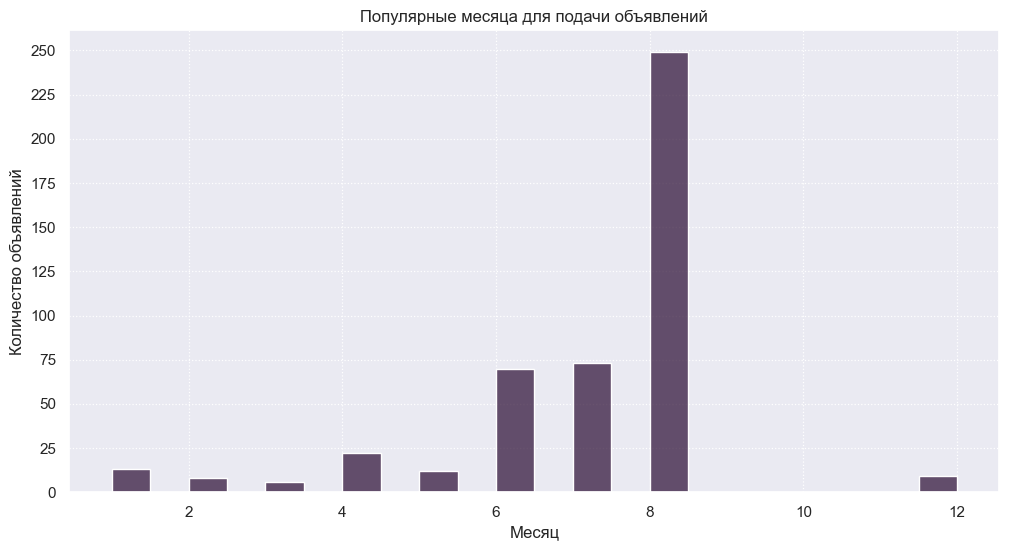

In [78]:
plt.figure(figsize=(12,6))
sns.histplot(data=df['month'])
plt.grid(linestyle=':', linewidth=0.9)
plt

plt.title('Популярные месяца для подачи объявлений')
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.yticks(np.arange(0, 275, step=25));

Продавцы недвижимости стремятся обновлять объявления, так как на сайте они ранжированы по дате и, соответственно, более новые будут выше и заметней для потенциальных клиетов. Из этого следует что мы не сможем сдлеать вывод о сезонности  в продажах квартир, популярных  днях недели и других признаках основанных на дате.

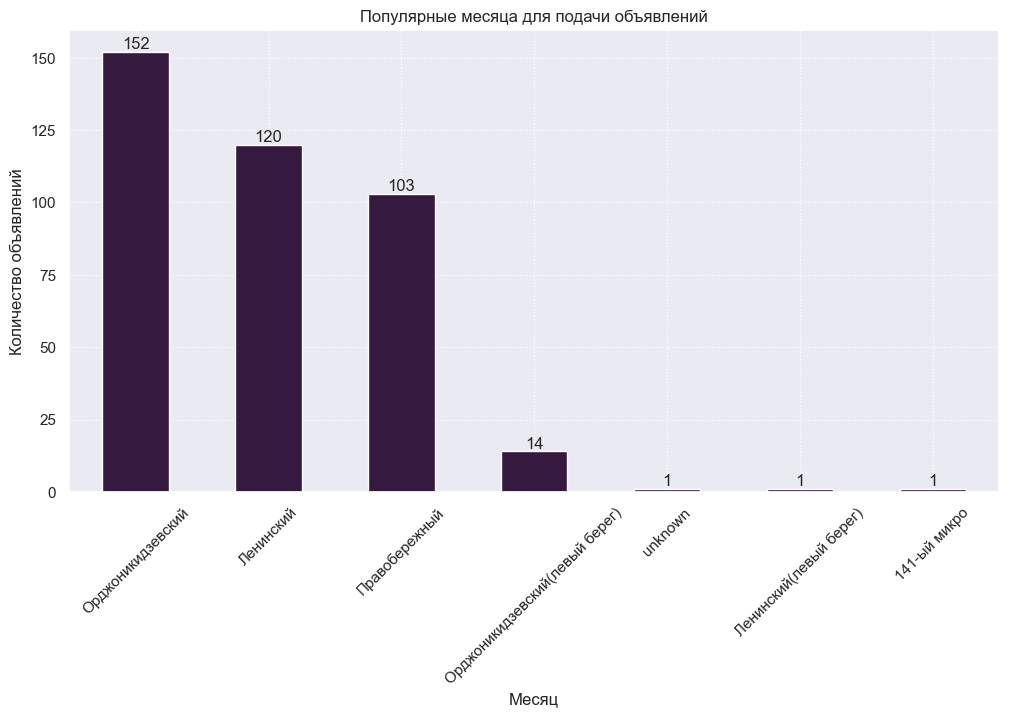

In [79]:
plt.figure(figsize=(12,6))
ax = df.district.value_counts().plot(kind='bar')
plt.grid(linestyle=':', linewidth=0.9)
plt.xticks(rotation=45)
for c in ax.containers:
    ax.bar_label(c, label_type='edge')

plt.title('Популярные месяца для подачи объявлений')
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.yticks(np.arange(0, 175, step=25));

Наиболее часто встречается недвижимость с Орджоникидзевского района. Расположение относительно берега р. Урал похоже что часто не указывается.

Топ 10 популярных домов

In [80]:
df['street'].value_counts().head(10)

street
Магнитогорск, Ленина пр-т, 18      11
Магнитогорск, Карла Маркса, 233     5
Магнитогорск, Ленина пр-т, 87а      5
Магнитогорск, Зеленый Лог, 63       4
Магнитогорск, unknown               4
Магнитогорск, Ленина пр-т, 214Б     3
Магнитогорск, Ленина пр-т, 129      3
Магнитогорск, Труда, 49/1           3
Магнитогорск, Помяловского, 7       3
Магнитогорск, Ленина пр-т, 87А      3
Name: count, dtype: int64

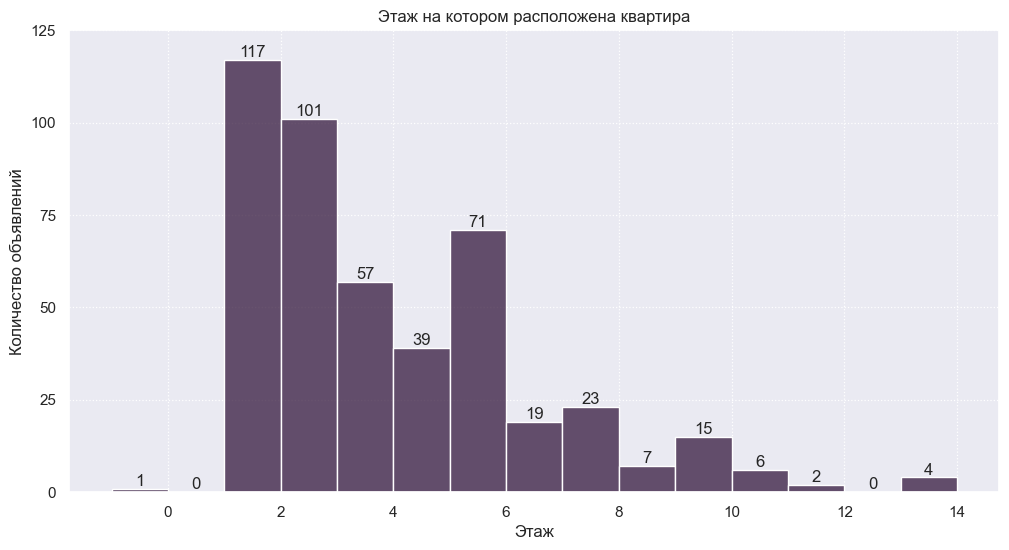

In [81]:
plt.figure(figsize=(12,6))
ax = sns.histplot(data=df['floor'])
plt.grid(linestyle=':', linewidth=0.9)
plt

for c in ax.containers:
    ax.bar_label(c, label_type='edge')

plt.title('Этаж на котором расположена квартира')
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.yticks(np.arange(0, 145, step=25));

По популярности выделяются 1,2 и 5 этаж

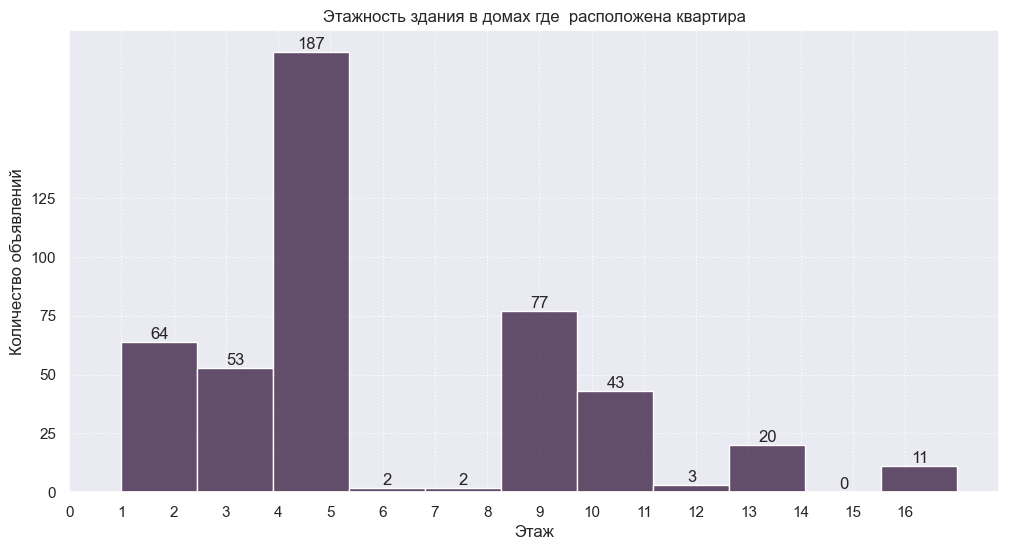

In [82]:
plt.figure(figsize=(12,6))
ax = sns.histplot(data=df['total_floors'])
plt.grid(linestyle=':', linewidth=0.9)
plt

for c in ax.containers:
    ax.bar_label(c, label_type='edge')

plt.title('Этажность здания в домах где  расположена квартира')
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.yticks(np.arange(0, 145, step=25))
plt.xticks(np.arange(0, 17, step=1));

По всей видимости преобладает 5 этажная застройка. Также типичны  2,3,9,10 этажные дома 

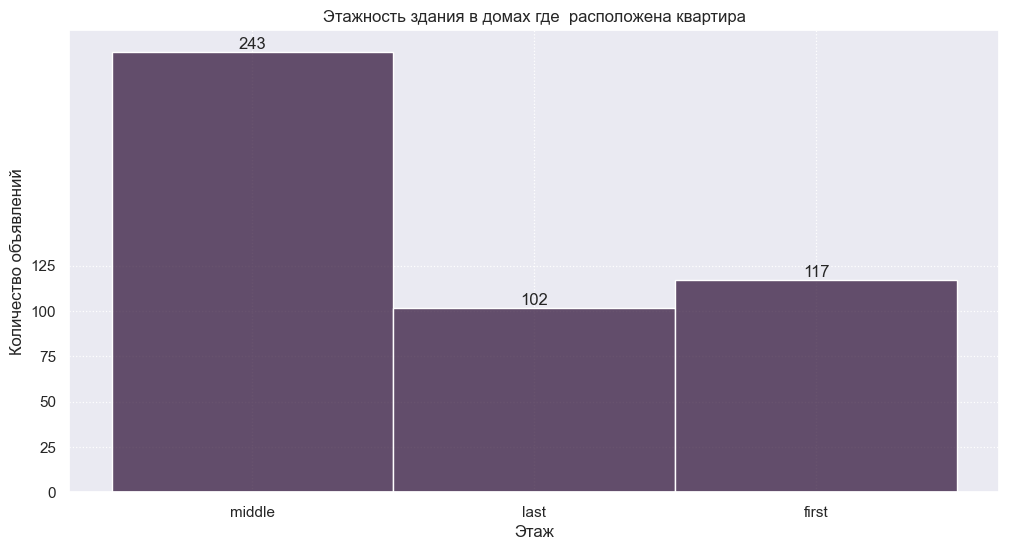

In [83]:
plt.figure(figsize=(12,6))
ax = sns.histplot(data=df['floor_type'])
plt.grid(linestyle=':', linewidth=0.9)
plt

for c in ax.containers:
    ax.bar_label(c, label_type='edge')

plt.title('Этажность здания в домах где  расположена квартира')
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.yticks(np.arange(0, 145, step=25));

Первые и последние этажи встречаются довольно часто относительно остальных

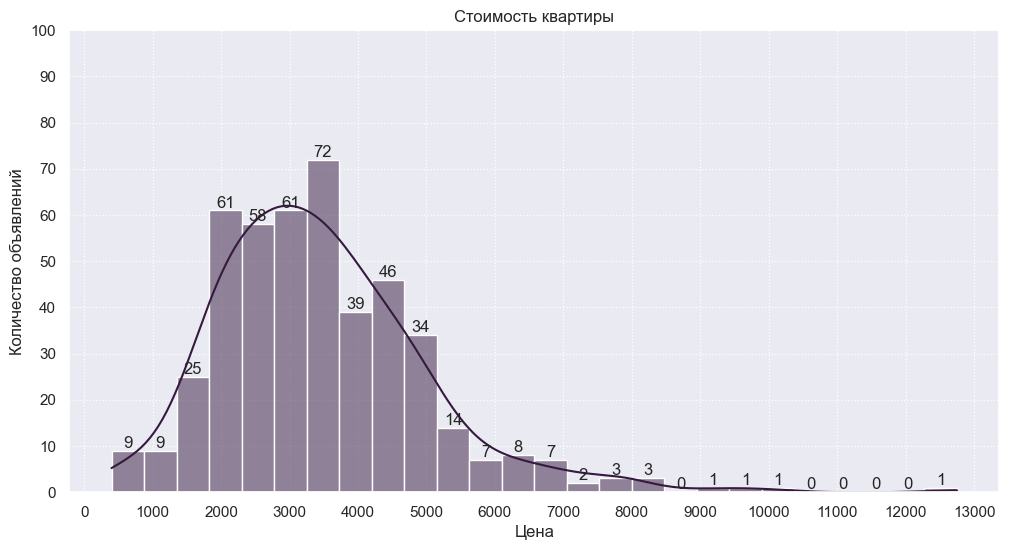

In [84]:
plt.figure(figsize=(12,6))
ax = sns.histplot(data=df['price'], kde=True)
plt.grid(linestyle=':', linewidth=0.9)
plt

for c in ax.containers:
    ax.bar_label(c, label_type='edge')

plt.title('Стоимость квартиры')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.yticks(np.arange(0, 110, step=10))
plt.xticks(np.arange(0, 14000, step=1000));

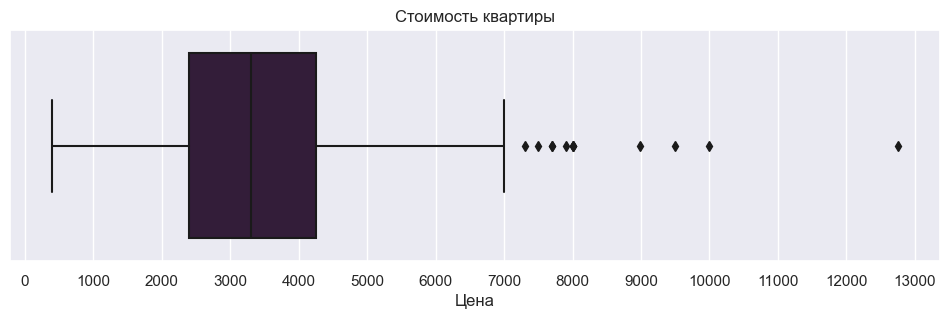

In [85]:
plt.figure(figsize=(12,3))
plt.title('Стоимость квартиры')
sns.boxplot(x = "price",data=df, orient='h')
plt.xlabel('Цена')
plt.xticks(np.arange(0, 14000, step=1000));

Основная часть цен на квартиры лежит в диапазоне от 2,3 до 4,2 млн. Встречаются как очень дешевые квартиры около 1 млн. Так и сверхдорогие свыше 7 млн.

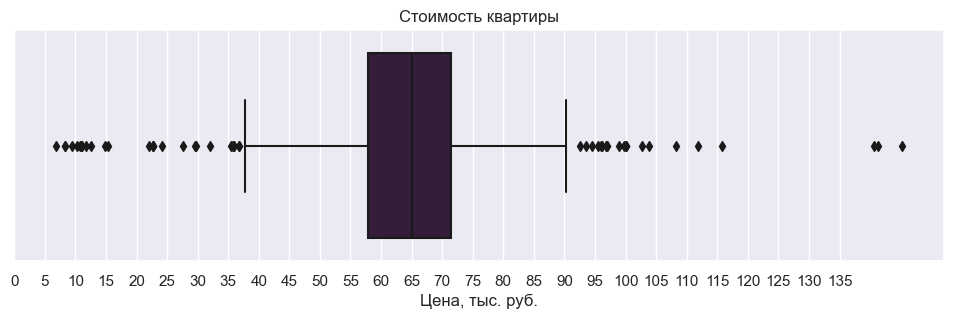

In [86]:
plt.figure(figsize=(12,3))
plt.title('Стоимость квартиры')
sns.boxplot(x = "price_sq_meter",data=df, orient='h')
plt.xlabel('Цена, тыс. руб.')
plt.xticks(np.arange(0, 140, step=5));

Цена за 1м2 в среднем от 57 до 72 тыс. Значения меньше 17 и выше 120 выглядят как выбросы и не отражают основную тенденцию разброса цен на рынке

In [87]:
df.columns

Index(['date', 'day', 'month', 'year', 'dayofweek', 'rooms', 'district', 'street', 'floor', 'total_floors', 'total_area', 'living_area', 'kitchen_area', 'price', 'lat_long', 'park_eko', 'attraction', 'south', 'eternal_fire', 'veter', 'price_sq_meter', 'city_center', 'floor_type'], dtype='object')

<Axes: xlabel='city_center', ylabel='price_sq_meter'>

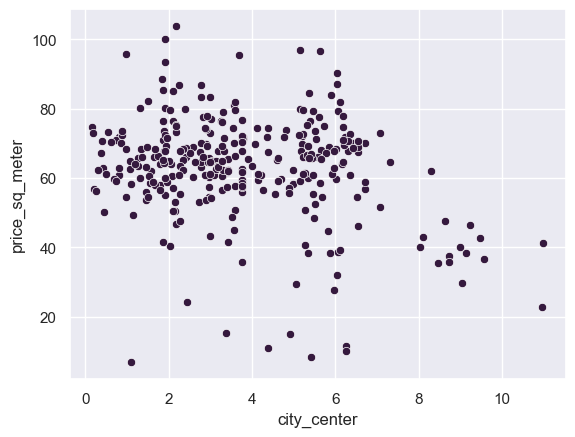

In [88]:
sns.scatterplot(data=df, x="city_center", y="price_sq_meter")

<Axes: ylabel='price_sq_meter'>

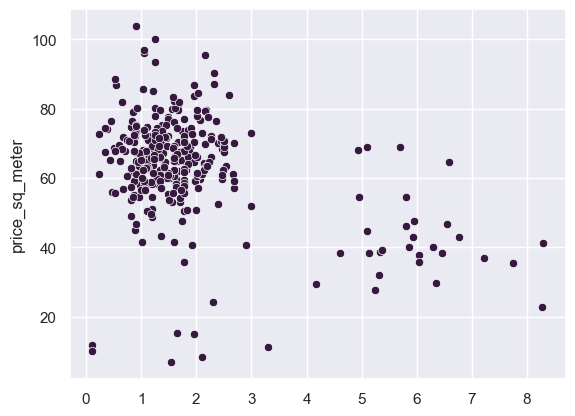

In [89]:
sns.scatterplot(data=df, x=df[['park_eko', 'attraction', 'south', 'eternal_fire', 'veter']].min(axis=1), y="price_sq_meter")

In [90]:
df[df.select_dtypes('number').columns]

,day,month,year,dayofweek,rooms,floor,total_floors,total_area,living_area,kitchen_area,price,park_eko,attraction,south,eternal_fire,veter,price_sq_meter,city_center
0,25,8,2023,4,2,8.0,9.0,50.0,30.0,9.0,3600.0,4.66,2.70,1.49,4.65,7.30,72.000000,4.76
1,25,8,2023,4,2,5.0,5.0,44.0,27.0,6.0,2900.0,2.67,1.19,3.49,3.06,5.68,65.909091,2.96
2,25,8,2023,4,1,1.0,1.0,32.0,17.0,7.0,1600.0,NaN,NaN,NaN,NaN,NaN,50.000000,NaN
3,25,8,2023,4,5,3.0,3.0,149.0,100.0,12.0,12750.0,3.32,5.21,7.96,1.95,1.04,85.570470,1.87
4,25,8,2023,4,2,5.0,5.0,44.0,29.0,6.0,2930.0,NaN,NaN,NaN,NaN,NaN,66.590909,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,20,8,2023,6,3,5.0,5.0,74.0,56.0,9.0,5500.0,4.32,6.22,8.82,2.81,0.34,74.324324,2.86
464,12,5,2022,3,2,1.0,5.0,41.0,22.2,7.2,930.0,12.63,14.30,15.76,10.60,8.28,22.682927,10.96
465,1,6,2023,3,2,5.0,5.0,42.5,29.0,6.0,2650.0,1.74,3.41,6.40,1.03,2.77,62.352941,0.31
466,8,8,2023,1,2,3.0,9.0,50.0,30.0,9.0,3350.0,5.87,4.29,1.65,5.06,7.53,67.000000,5.41


In [91]:
import phik

interval columns not set, guessing: ['day', 'month', 'year', 'dayofweek', 'rooms', 'floor', 'total_floors', 'total_area', 'living_area', 'kitchen_area', 'price', 'park_eko', 'attraction', 'south', 'eternal_fire', 'veter', 'price_sq_meter', 'city_center']


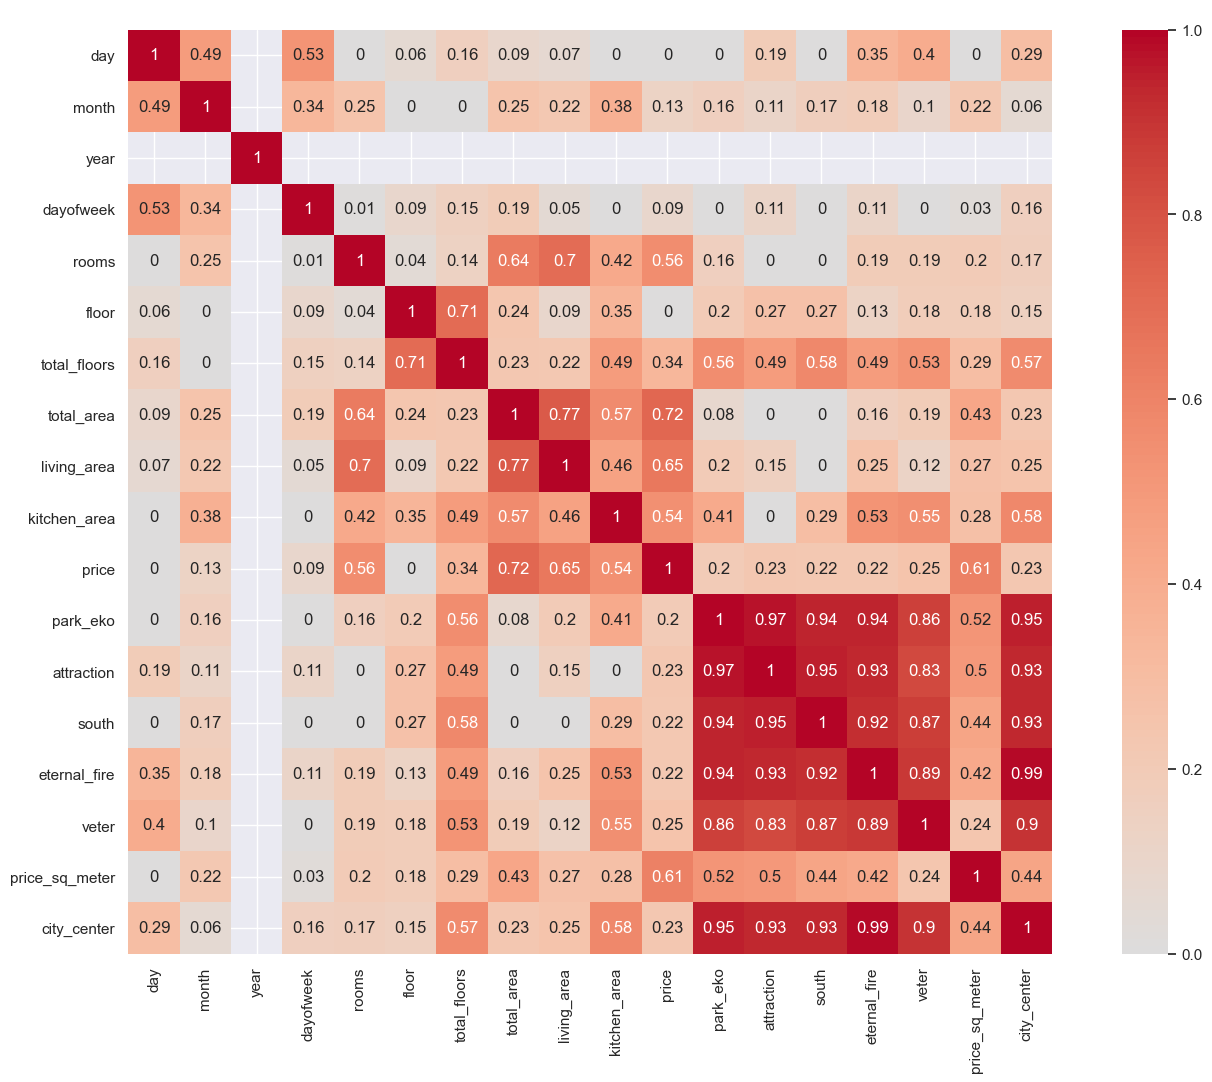

In [92]:
phik_overview = df[df.select_dtypes('number').columns].phik_matrix()
plt.figure(figsize=(18, 12))
plt.title(' ')
sns.heatmap(round(phik_overview, 2), 
            annot=True, 
            vmin=0, 
            vmax=1, 
            center=0, 
            cmap='coolwarm', 
            square=True);

Расстояния до парков мультиколлинеарны между собой. Наибольшее влияние на цену оказывает, как и ожидается, площадь квартиры и признаки косвенно от нее зависящие. Ожидалось что расстояние до центра города будет влиять сильнее на цену, но по всей видимости Магнитогорск не достаточно большой город по площади или не слишком высокий темп строительства(новые площади не так сильно требуются)

In [93]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [94]:
pd.DataFrame({
    'latitude': [55.7522, 55.7561, 55.7603, 55.7658, 55.7705],
    'longitude': [37.6155, 37.6177, 37.6166, 37.6180, 37.6179],
    'cost': [100, 200, 300, 400, 500]
})

,latitude,longitude,cost
0,55.7522,37.6155,100
1,55.7561,37.6177,200
2,55.7603,37.6166,300
3,55.7658,37.6180,400
4,55.7705,37.6179,500


In [96]:
import folium
from folium.plugins import HeatMap

In [97]:
df['lat_long'] = df['lat_long'].dropna().apply(lambda x: tuple(float(i) for i in x.strip('()').split(',')))

In [120]:
# Создание карты
m = folium.Map(
    location=[53.407164, 58.980285],  # Центр города
    zoom_start=12  # Масштаб карты
)

drop_center = (53.3735251, 58.9769375)

In [117]:
heat_map = folium.plugins.HeatMap(
    data=[[row['lat_long'][0], row['lat_long'][1], row['price_sq_meter']] for index, row in df.query('lat_long != @drop_center').dropna().iterrows()],
    #gradient=color_map,
    radius=20
).add_to(m)

m

По тепловой карте стоимости кв.м видим, что в основном недвижимость с высокой стоимостью концентрируется на севере на правом берегу. Также есть небольшие участки в центре и на юге.